In [84]:
%run lib.py
%matplotlib inline

---

In [85]:
score_df = pd.read_csv('data/text_to_topic_scores.csv', index_col=0)

texts_pr = pd.read_csv('texts_preproc_relevant.csv', index_col=0)

texts = pd.read_csv('papers_parsed_relevant.csv', index_col=0)\
    .loc[:, ['journal', 'date_parsed']]\
    .reindex(texts_pr.index)\
    .reset_index(drop=True)

In [86]:
score_df.head()

,1.1.1.1. -- Sample complexity and generalization bounds,1.1.1.2. -- Boolean function learning,1.1.1.3. -- Unsupervised learning and clustering,1.1.1.4.1. -- Support vector machines,1.1.1.4.2. -- Gaussian processes,1.1.1.4.3. -- Modelling,1.1.1.5. -- Boosting,1.1.1.6. -- Bayesian analysis,1.1.1.7. -- Inductive inference,1.1.1.8. -- Online learning theory,...,5.2.4.1.3. -- Policy iteration,5.2.4.1.4. -- Temporal difference learning,5.2.4.1.5. -- Approximate dynamic programming methods,5.2.4.2.1. -- Boosting,5.2.4.2.2. -- Bagging,5.2.4.2.3. -- Fusion of classifiers,5.2.4.3.1 -- Spectral clustering,5.2.4.4. -- Feature selection,5.2.4.5.1 -- Generalized eigenvalue,5.2.5. -- Cross-validation
190,0.394070,0.144253,0.233604,0.112744,0.147250,0.107093,0.114391,0.258695,0.200315,0.097679,...,0.185242,0.218481,0.110337,0.114391,0.104681,0.158266,0.318433,0.158014,0.256435,0.183144
212,0.217876,0.111534,0.453980,0.401163,0.111159,0.117699,0.173131,0.086594,0.202730,0.177784,...,0.250096,0.120496,0.126236,0.173131,0.117375,0.294314,0.308370,0.155905,0.257863,0.208885
26,0.122168,0.230001,0.236107,0.150027,0.131785,0.126220,0.129434,0.092483,0.147118,0.119895,...,0.168294,0.117355,0.162667,0.129434,0.099680,0.149951,0.287257,0.178085,0.161595,0.186693
199,0.160326,0.155990,0.214961,0.097006,0.140498,0.134812,0.112219,0.096567,0.181090,0.116904,...,0.225504,0.126078,0.113291,0.112219,0.104527,0.138200,0.347347,0.184057,0.108125,0.181704
105,0.148835,0.139646,0.269425,0.127816,0.149889,0.211745,0.154103,0.305693,0.204949,0.095065,...,0.194092,0.199985,0.110115,0.154103,0.073106,0.149627,0.318368,0.183593,0.170725,0.357219


In [87]:
score_array = score_df.values
score_indices = score_df.index.values

In [88]:
score_array.shape

(26799, 353)

In [89]:
score_indices.shape

(26799,)

In [90]:
topics = score_df.columns

In [91]:
len(topics)

353

### check text-topic relations

In [92]:
np.where(topics.str.contains('markov', case=False))

(array([ 21,  36,  58,  75, 321, 335, 336]),)

In [93]:
n= 36

In [94]:
topics[n]

'2.1.1.2. -- Markov networks'

In [95]:
score_array[:, n].argmax(), score_array[:, n].max()

(17379, 0.6310995035700194)

In [96]:
texts_pr.loc[score_indices[score_array[:, n].argmax()]]

0    sequential inference markov networks dynamic programming structural pattern recognition inference markov networks finite sets sample strings formulated using dynamic programming strings installed network sequentially via stringtonetwork alignments computed dynamic programming matrix cost function based relative frequency estimates transition probabilities emphasize landmark substrings common sample set classification experiment indicates potential method pattern description recognition
Name: 43642, dtype: object

---


In [97]:
from topic_corelevance import TopicCorelevanceBuilder

In [98]:
np.quantile(score_df,0.2)

0.10985115918493865

In [99]:
t = TopicCorelevanceBuilder(score_df, 0.4)

In [100]:
relevants = t.relevants
max_relevant = relevants.max()

In [101]:
def binarize(x):
    if x < 2:
        return x
    if x >= 2 and x <= 4:
        return 2
    elif x >= 5 and x <= 11:
        return 3
    else:
        return 4
    

In [102]:
relevants.map(binarize).value_counts().sort_index()

0    2401 
1    3867 
2    10868
3    8921 
4    742  
dtype: int64

In [103]:
relevants.map(binarize).value_counts().sort_index() / len(relevants) * 100


0    8.959290 
1    14.429643
2    40.553752
3    33.288556
4    2.768760 
dtype: float64

In [104]:
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('ggplot')

In [105]:
len(relevants)

26799

FileNotFoundError: [Errno 2] No such file or directory: 'images/relevants_hist.eps'

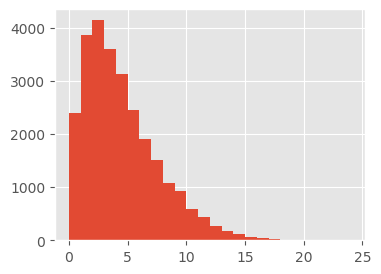

In [106]:

plt.figure(figsize=(4, 3))
plt.hist(relevants, len(np.unique(relevants)));
plt.savefig('images/relevants_hist.eps', bbox_inches='tight')

In [107]:
relevants.value_counts().sort_index()

0     2401
1     3867
2     4137
3     3603
4     3128
5     2458
6     1912
7     1510
8     1084
9     932 
10    589 
11    436 
12    266 
13    178 
14    117 
15    70  
16    51  
17    29  
18    13  
19    6   
20    5   
21    3   
22    2   
24    2   
dtype: int64

In [108]:
relevance_weights = t.relevance_weights

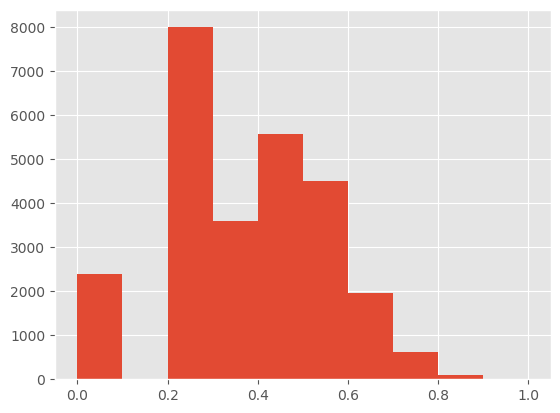

In [109]:
plt.hist(relevance_weights);

In [110]:
score_array_wt = t.scores_wt

In [111]:
score_array_wt.shape

(26799, 353)

In [112]:
sim = t.corelevance

In [113]:
(score_array_wt[:, 0] * score_array_wt[:, 0] ).sum()

182.80264694170302

In [114]:
sim

array([[ 182.8026,  177.2971,  173.7716, ...,  236.2287,  144.0209,
         177.9768],
       [ 177.2971,  205.4408,  194.514 , ...,  250.9833,  143.7945,
         186.7143],
       [ 173.7716,  194.514 ,  222.1623, ...,  246.4655,  141.4384,
         183.0641],
       ...,
       [ 236.2287,  250.9833,  246.4655, ...,  380.8363,  192.9434,
         253.6009],
       [ 144.0209,  143.7945,  141.4384, ...,  192.9434,  128.7435,
         146.7811],
       [ 177.9768,  186.7143,  183.0641, ...,  253.6009,  146.7811,
         212.111 ]])

In [115]:
joblib.dump(sim, 'data/sim.pickle')

['data/sim.pickle']

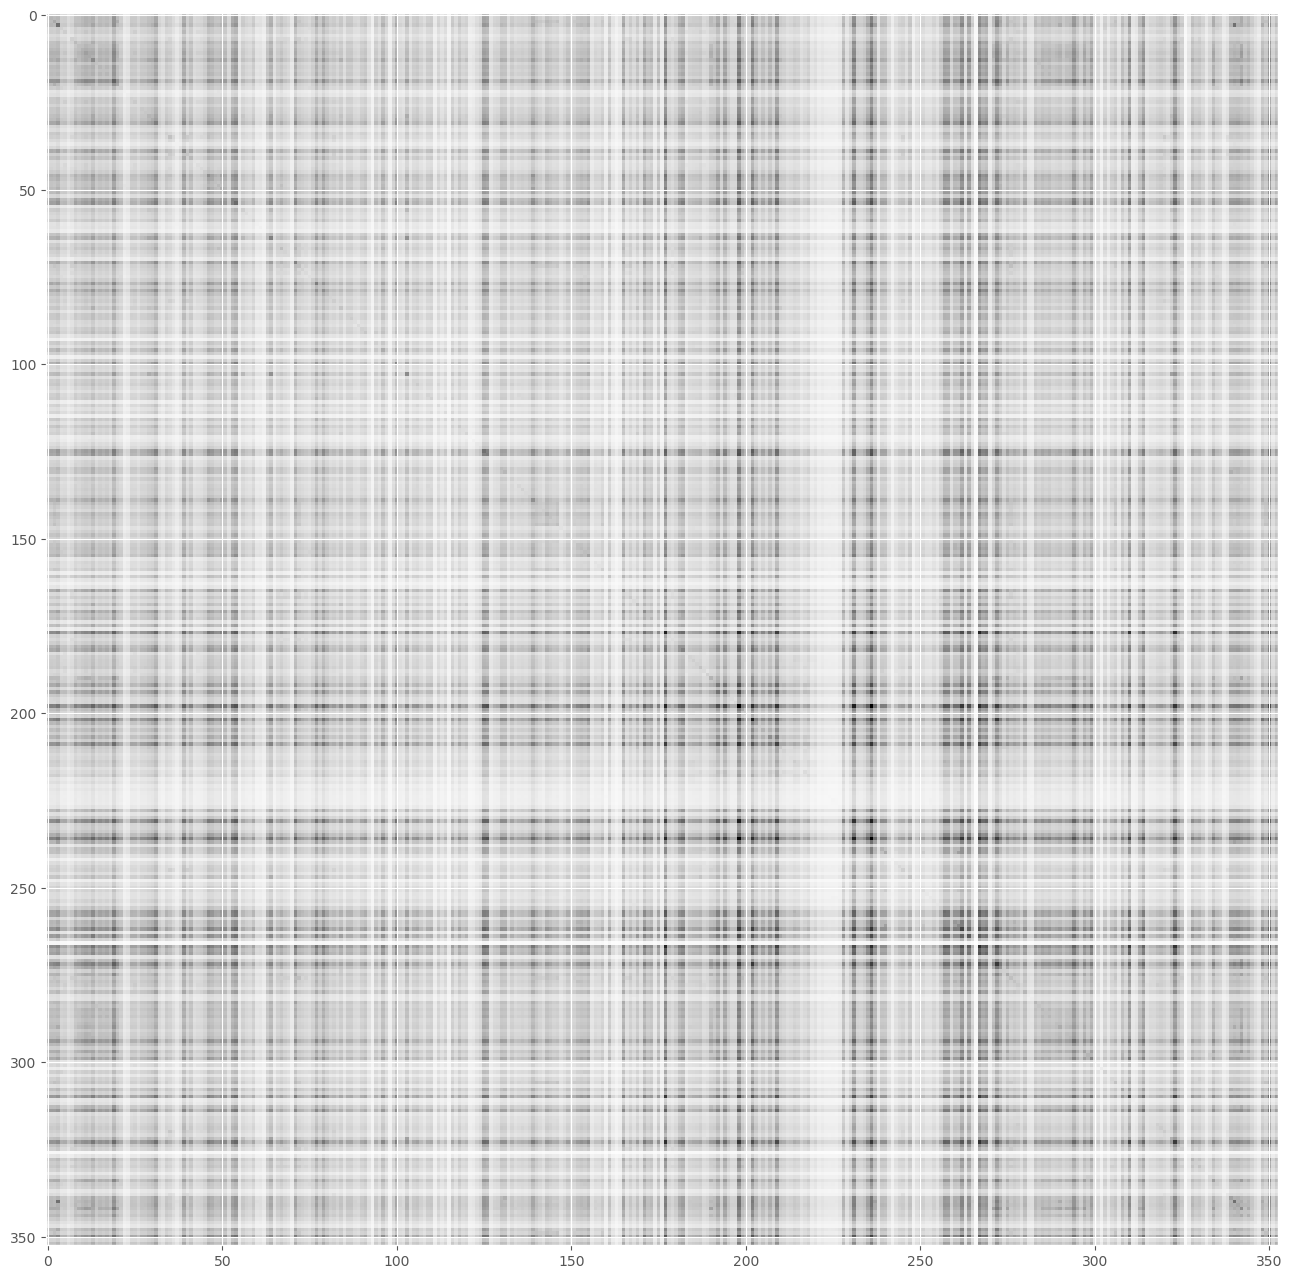

In [116]:
plt.figure(figsize=(16, 16))
plt.imshow(sim, cmap='Greys');

In [117]:
from scipy.sparse.csgraph import reverse_cuthill_mckee
from scipy import sparse

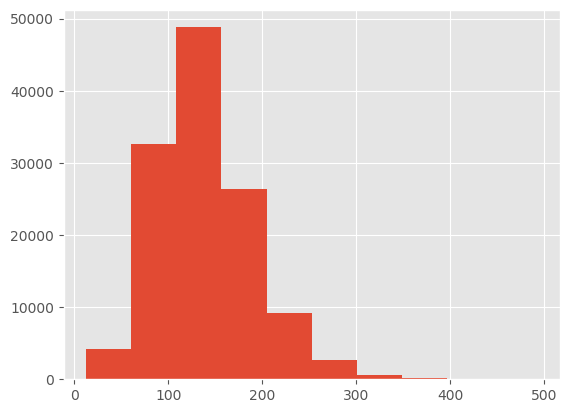

In [118]:
plt.hist(sim.ravel());

In [119]:
sim_sparse = sim.copy()
sim_sparse[sim_sparse < 0.65] = 0

In [120]:
sim_sparse = sparse.csr_matrix(sim_sparse)

In [121]:
perm = reverse_cuthill_mckee(sim_sparse)
sim_reord = sim[perm]

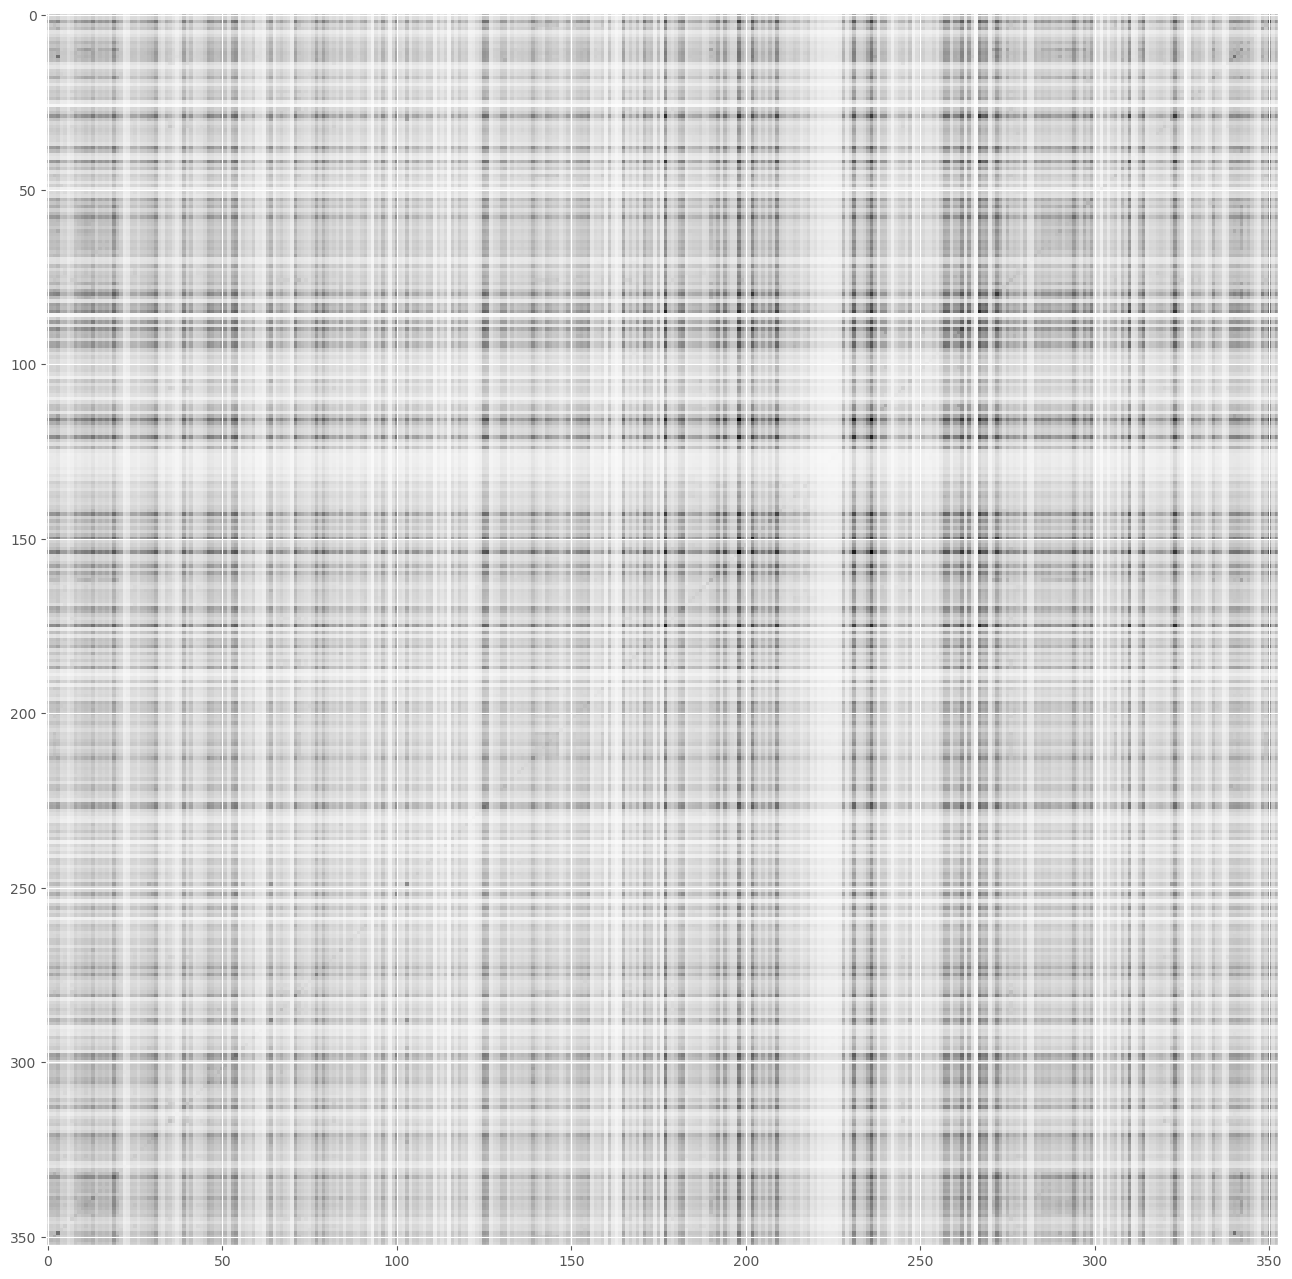

In [122]:
plt.figure(figsize=(16, 16))
plt.imshow(sim_reord, cmap='Greys');

---

LAPIN

In [123]:
from lapin import LapinTransformer

In [124]:
t = LapinTransformer(sim)

In [125]:
W = t.W
D = t.D
L = t.L
Ln = t.Ln
Lp = t.Lp

In [126]:
joblib.dump(L, 'data/sim_laplacian.pickle')
joblib.dump(Ln, 'data/sim_laplacian_norm.pickle')

['data/sim_laplacian_norm.pickle']

In [127]:
w_lp, v_lp = np.linalg.eig(Lp)

In [128]:
# Lp[np.eye(Lp.shape[0]).astype(bool)] = Lp[~np.eye(Lp.shape[0]).astype(bool)].mean()

In [129]:
np.linalg.eig(Lp)[0].min()

-4.61875680862263e-17

In [130]:
Lp_display = Lp.copy()
Lp_display[np.eye(Lp_display.shape[0], dtype=bool)] = Lp_display.mean()

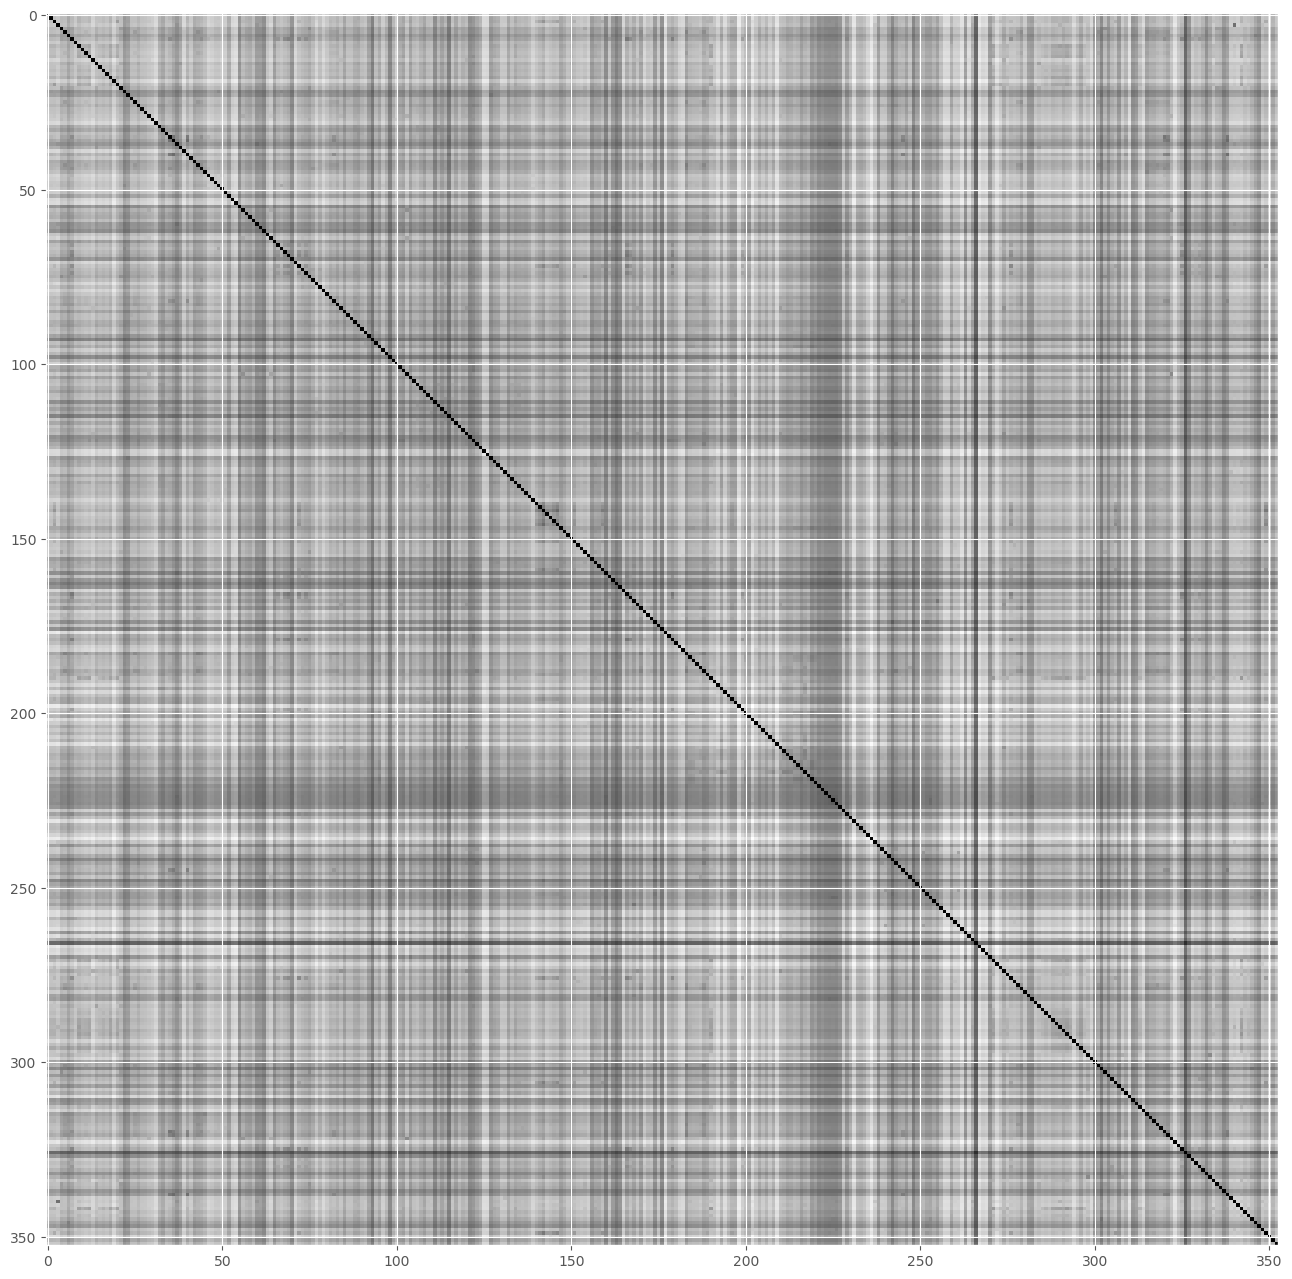

In [131]:
plt.figure(figsize=(16, 16))
plt.imshow(Lp_display, cmap='Greys');

In [132]:
joblib.dump(Lp, 'data/sim_lapin.pickle')

['data/sim_lapin.pickle']

---